# Project 4 :Wrangle and analyze data

## 1. Introduction

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

## 2. Data Wrangling

## 2.1 Gather Data

### First File: twitter-archive-enhanced.csv

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Second File: image_predictions.tsv

Download image predictions file from the Udacity website and then save tsv to file

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)


with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_prediction = pd.read_csv("image_predictions.tsv", sep="\t")

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Third File: tweet_json.txt

Download file json

In [6]:
response = requests.get('https://video.udacity-data.com/topher/2018/November/5bf60fda_tweet-json/tweet-json')
with open('tweet_json.txt', mode = 'wb') as file:
  file.write(response.content)

f = 'tweet_json.txt'
records = [json.loads(line) for line in open(f)]
records[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
# From the text file read the JSON data
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        # create a dictionary with the JSON data, then add to a list tweet_id, favorites, retweets from the JSON data
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
# convert the tweet JSON data dictionary list to a DataFrame
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])

In [8]:
tweet_selected_attr.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


store the variables tweet_id, favorites and retweets in the file tweet_data_json.csv 

In [9]:
tweet_selected_attr.to_csv('tweet_data_json.csv', index = False)

## 2.2 Accessing Data :

#### First File: twitter-archive-enhanced.csv

In [10]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Miguel       1
Wesley       1
Bones        1
Boots        1
Arlo         1
Name: name, Length: 957, dtype: int64

In [16]:
sum(twitter_archive_enhanced.duplicated())

0

#### Second File: image_predictions.tsv

In [17]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
sum(image_prediction.jpg_url.duplicated())

66

In [21]:
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


#### Third File: tweet_json.txt

In [22]:
tweet_selected_attr.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [23]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   favorites  2354 non-null   int64
 2   retweets   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
tweet_selected_attr.describe()

,tweet_id,favorites,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [25]:
sum(tweet_selected_attr.duplicated())

0

 __________________________________________________________________________

## Quality And Tidiness Issues:


#### Quality Issues:
   - The Column timestamp has invalid format, it should be a datetime type.
   - The Column tweet_id Change from an integer to string .
       
   - The columns(in_reply_to_status_id, in_reply_to_user_id) have only 78 values and 2278 missing values (Null values).
   - The columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have only 181 values and 2175 missing values (Null values), and retweeted_status_timestamp Column has invalid format.
   - The Column expanded_urls has only 2297 values and 59 missing values (Null values).
   - Remove html tags in source column
   - The Column tweet_id Change from an integer to a string .

   - Drop duplicates in jpg_url column
   - The file has 2354 rows, the same of tweeter archive file, no issu
    - Merge the columns (p1, p1_dog, p2, p2_dog, p3, p3_dog) in one column called: image prediction , and Merge the columns(p1_conf, p2_conf, p3_conf) in one column called confidence level.


     
#### Tidiness Issues:
   - Drop columns with missing values:
       retweeted_status_user_id
       retweeted_status_id
       retweeted_status_timestamp
       in_reply_to_user_id
       in_reply_to_status_id

   - The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo. 
   - Information about one type of observational unit (tweets) is spread across three different files/dataframes.
   - Data in columns p1, p2, and p3 have some uppercase and lowercase letters.   
        







## 2.3 Cleaning Data:

In [26]:
# Making a copy of all  dataframes

archive_clean = twitter_archive_enhanced.copy()
img_clean= image_prediction.copy()
tweet_clean = tweet_selected_attr.copy()

### Define

Change format for timestamp and tweet_id column:
  - The Column timestamp has invalid format, it should be a datetime type.
  - The Column tweet_id change from an integer to string .

### Code

In [27]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [29]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [30]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   int64 
 2   retweets   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


 __________________________________________________________________________

### Define

The Column expanded_urls has only 2297 values and 59 missing values (Null values).

### Code

In [31]:
archive_clean['expanded_urls']=archive_clean['expanded_urls'].fillna("Not specified")

### Test

In [32]:
archive_clean.expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

 __________________________________________________________________________

### Define

Remove html tags in source column

### Code

In [33]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
archive_clean.source = archive_clean.source.astype('category')

### Test

In [34]:
archive_clean['source'].head(3)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

 __________________________________________________________________________

### Define

             
      Drop @ RT  retweets data wich make duplicates 

### Code

In [37]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

### Test

In [38]:
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

 __________________________________________________________________________

### Define

      Drop columns with missing values:
             retweeted_status_user_id
             retweeted_status_id
             retweeted_status_timestamp
             in_reply_to_user_id
             in_reply_to_status_id

### Code

In [39]:
archive_clean.drop(['retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_user_id','in_reply_to_status_id' ], axis=1, inplace=True)

### Test

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC

 __________________________________________________________________________

### Define

The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

### Code

In [41]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2175,2175,2175,2175
unique,2,2,2,2
top,None,None,None,None
freq,2088,2165,1941,2150


In [42]:
archive_clean['doggo'].replace('None', '', inplace=True)
archive_clean['floofer'].replace('None', '', inplace=True)
archive_clean['pupper'].replace('None', '', inplace=True)
archive_clean['puppo'].replace('None', '', inplace=True)

In [43]:
archive_clean['Dog_Stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [44]:
archive_clean.loc[archive_clean.Dog_Stage == '', 'Dog_Stage'] = np.nan

In [77]:
archive_clean['Dog_Stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: Dog_Stage, dtype: int64

In [78]:
archive_clean.loc[archive_clean.Dog_Stage == 'doggopupper', 'Dog_Stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.Dog_Stage == 'doggofloofer', 'Dog_Stage'] = 'doggo, floofer'
archive_clean.loc[archive_clean.Dog_Stage == 'doggopuppo', 'Dog_Stage'] = 'doggo, puppo'

In [79]:
archive_clean['Dog_Stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: Dog_Stage, dtype: int64

In [81]:
archive_clean['Dog_Stage'].isnull().value_counts()

True     1831
False     344
Name: Dog_Stage, dtype: int64

In [48]:
archive_clean = archive_clean.drop(['pupper',
                                    'doggo',
                                    'puppo',
                                    'floofer'], axis = 1)

### Test

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   expanded_urls       2175 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   Dog_Stage           344 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 155.2+ KB


 __________________________________________________________________________

### Define

Drop duplicates in jpg_url column

### Code

In [50]:
img_clean[img_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,707776935007539200,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,706681918348251136,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,705442520700944385,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,704491224099647488,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,704134088924532736,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,674638615994089473,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,673708611235921920,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,672614745925664768,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,671542985629241344,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [51]:
img_clean.drop_duplicates('jpg_url' , inplace = True)

### Test

In [52]:
sum(img_clean.jpg_url.duplicated())

0

 __________________________________________________________________________

### Define

Data in columns p1, p2, and p3 have some uppercase and lowercase letters.

The capitalize() method returns a copy of the original string and converts the first character of the string to a capital (uppercase)letter while making all other characters in the string lowercase letters.
 



### Code

In [53]:
img_clean['p1'] = img_clean['p1'].str.capitalize() 
img_clean['p2'] = img_clean['p2'].str.capitalize() 
img_clean['p3'] = img_clean['p3'].str.capitalize() 

### Test

In [54]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,892177421306343426,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,891815181378084864,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,891689557279858688,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,891327558926688256,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


 __________________________________________________________________________

### Define

Merge the columns (p1, p1_dog, p2, p2_dog, p3, p3_dog) in one column called: image prediction , and merge the columns(p1_conf, p2_conf, p3_conf) in one column called confidence level.

### Code

In [55]:
dog_type = []
confidence_level = []

def image(img_clean):
    if img_clean['p1_dog'] == True:
        dog_type.append(img_clean['p1'])
        confidence_level.append(img_clean['p1_conf'])
    elif img_clean['p2_dog'] == True:
        dog_type.append(img_clean['p2'])
        confidence_level.append(img_clean['p2_conf'])
    elif img_clean['p3_dog'] == True:
        dog_type.append(img_clean['p3'])
        confidence_level.append(img_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_level.append('Error')

img_clean.apply(image, axis=1)

#create new columns
img_clean['dog_type'] = dog_type
img_clean['confidence_level'] = confidence_level

In [56]:
img_clean = img_clean[img_clean['dog_type'] != 'Error']

In [57]:
img_clean = img_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [58]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1691 non-null   object
 1   jpg_url           1691 non-null   object
 2   img_num           1691 non-null   int64 
 3   dog_type          1691 non-null   object
 4   confidence_level  1691 non-null   object
dtypes: int64(1), object(4)
memory usage: 79.3+ KB


 __________________________________________________________________________

### Define

Merge all three dataset and remove repetitive columns.

Take both the archive_clean and tweet_clean tables and merge into one table using the join() method on the columns tweet_id.

Then take the newly dataframe and combine with the image_clean table using the same join() method on the tweet_id column.

### Code

In [59]:
F_merge = archive_clean.join(tweet_clean.set_index('tweet_id'), on='tweet_id')

In [60]:
Marge = F_merge.join(img_clean.set_index('tweet_id'), on='tweet_id')

#### Test

In [61]:
Marge.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,favorites,retweets,jpg_url,img_num,dog_type,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature_pinscher,0.560311


## 3. Storing, Analyzing, and Visualizing Data

Store the clean DataFrame in a CSV file

In [62]:
Marge.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [63]:
data = Marge.copy()

### Insight 1: Determine most commonly used Source 

In [64]:
data['source'].value_counts().sort_index(ascending = False)

Vine - Make a Scene      91
Twitter for iPhone     2042
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

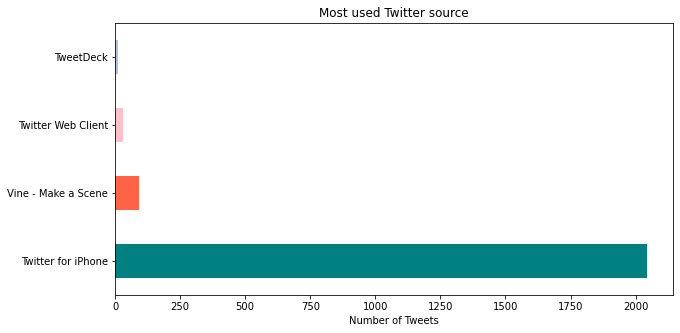

In [65]:
data['source'].value_counts()[0:4].plot(kind ='barh', color=['teal','tomato','pink','lightsteelblue'], figsize=(10,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('source.png');

### Insight 2: Mean Retweet and Mean Favorite of 'WeRateDogs' account 

In [66]:
retweet = int(data.retweets.mean())
favorite = int(data.favorites.mean())

print('Mean Retweet Count: ', retweet)
print('Mean Favorite Count: ', favorite)

Mean Retweet Count:  2757
Mean Favorite Count:  8746


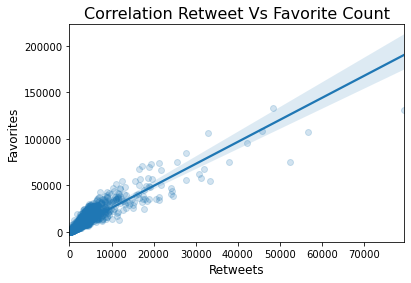

In [67]:
sns.regplot(x="retweets", y="favorites", data=data, scatter_kws={'alpha':0.2})
plt.title('Correlation Retweet Vs Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('Correlation.png');

### Insight 3: Time series analysis of Twitter data

Twitter data is very time specific and would be nice visually to see changes over time.

In [68]:
data_t = Marge.copy()
data_t['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    300
2015-12    388
2016-01    194
2016-02    125
2016-03    136
2016-04     60
2016-05     60
2016-06     94
2016-07     97
2016-08     63
2016-09     69
2016-10     73
2016-11     58
2016-12     59
2017-01     71
2017-02     72
2017-03     57
2017-04     49
2017-05     45
2017-06     50
2017-07     53
2017-08      2
Name: timestamp, dtype: int64

In [69]:
data_t= data.groupby([data["timestamp"].dt.year, data["timestamp"].dt.month]).count()

(0.0, 22.05)

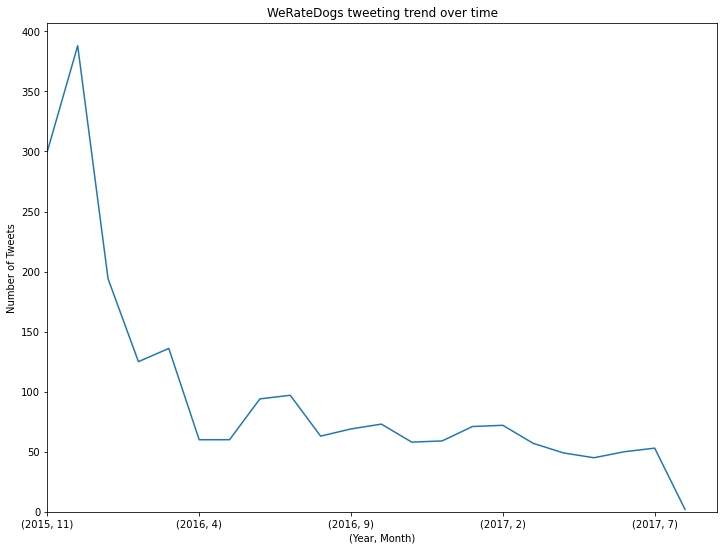

In [70]:
plt.rcParams["figure.figsize"] = [12, 9]
trend_tweet = data_t.timestamp.plot(kind ='line', title='WeRateDogs tweeting trend over time')
trend_tweet.set_xlabel("(Year, Month)")
trend_tweet.set_ylabel("Number of Tweets")
trend_tweet.set_ylim(0.0)
trend_tweet.set_xlim(0.0)

### Insight 4: Most common dog stage and Breeds

Text(0, 0.5, 'Count')

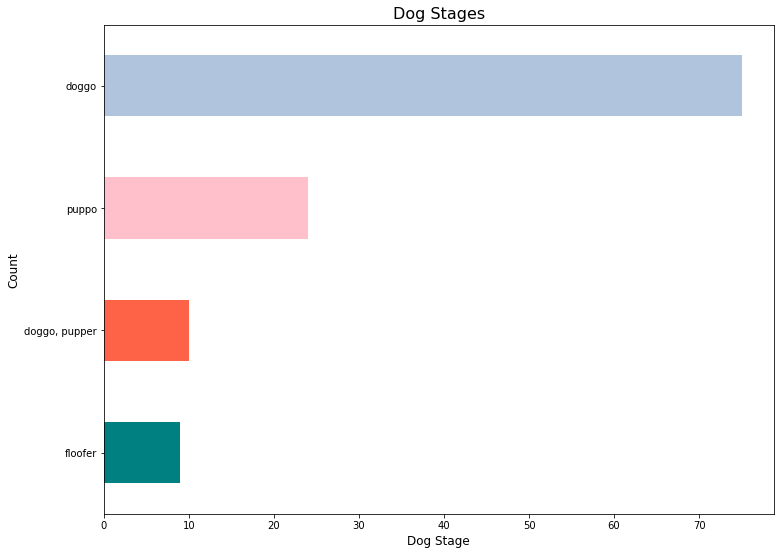

In [71]:
stages_dog = data['Dog_Stage'].value_counts()[1:5].sort_values(axis=0, ascending=True)
stages_dog.plot(kind = 'barh', color=['teal','tomato','pink','lightsteelblue'])
plt.title('Dog Stages', size=16)
plt.xlabel('Dog Stage', size=12)
plt.ylabel('Count', size=12)

Text(0, 0.5, 'Breed')

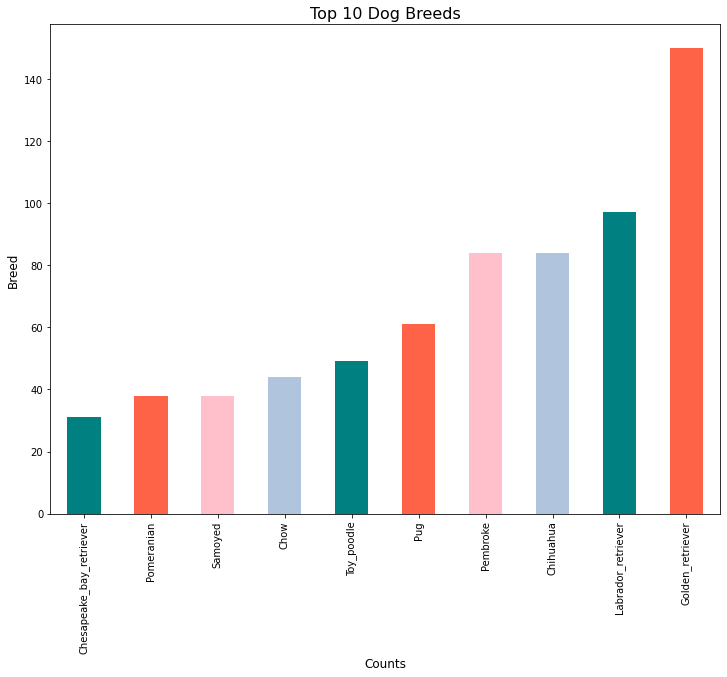

In [72]:
Breeds = data['dog_type'].value_counts()[0:10].sort_values(axis=0, ascending=True)
Breeds.plot(kind = 'bar', color=['teal','tomato','pink','lightsteelblue'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Counts', size=12)
plt.ylabel('Breed', size=12)

### Insight 5: Most frequently words

In [83]:
tweets = np.array(data.text)

my_list = []

for tweet in tweets:
    my_list.append(tweet.replace("\n",""))

In [84]:
image = np.array(Image.open(requests.get('https://clipartix.com/wp-content/uploads/2016/06/Custom-dog-bone-shaped-window-stickers-and-decals-cliparts.png', stream=True).raw))
text = my_list

In [85]:
def gen_wc(text, image):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=image).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

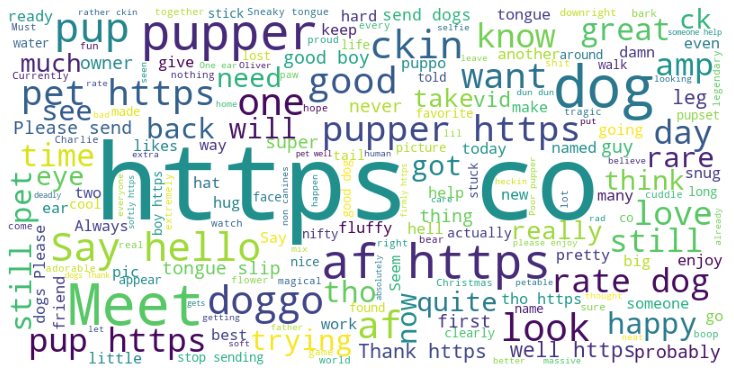

In [86]:
gen_wc(text, image)